## Visualiztion of historical accident number by category
#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Load dataset
The number of accidents for different categories per month.

In [2]:
df_raw = pd.read_csv('../data/monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')
df = df_raw.copy()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2016 non-null   object 
 1   AUSPRAEGUNG                     2016 non-null   object 
 2   JAHR                            2016 non-null   int64  
 3   MONAT                           2016 non-null   int64  
 4   WERT                            1848 non-null   float64
 5   VORJAHRESWERT                   1848 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1763 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 141.9+ KB
None


MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT  VORJAHRESWERT  \
0  Alkoholunfälle   insgesamt  2023  202301   NaN            NaN   
1  Alkoholunfälle   insgesamt  2023  202302   NaN            NaN   
2  Alkoholunfälle   insgesamt  2023  202303   NaN            NaN   
3  Alkoholunfälle   insgesamt  2023  202304   NaN            NaN   
4  Alkoholunfälle   insgesamt  2023  202305   NaN            NaN   

   VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
0                       NaN                             NaN   
1                       NaN                             NaN   
2                       NaN                             NaN   
3                       NaN                             NaN   
4                       NaN                             NaN   

   ZWOELF_MONATE_MITTELWERT  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

#### Data cleaning
Drop NaNs in "WERT".

In [3]:
df.dropna(axis=0, subset=['WERT'], inplace=True, ignore_index=True)
print(df.head())
print(df.info())
df[df.isnull().values]

       MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT  VORJAHRESWERT  \
0  Alkoholunfälle   insgesamt  2021  202101  16.0           28.0   
1  Alkoholunfälle   insgesamt  2021  202102  14.0           40.0   
2  Alkoholunfälle   insgesamt  2021  202103  24.0           27.0   
3  Alkoholunfälle   insgesamt  2021  202104  16.0           26.0   
4  Alkoholunfälle   insgesamt  2021  202105  24.0           40.0   

   VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
0                     23.08                          -42.86   
1                    -12.50                          -65.00   
2                     71.43                          -11.11   
3                    -33.33                          -38.46   
4                     50.00                          -40.00   

   ZWOELF_MONATE_MITTELWERT  
0                      35.0  
1                      33.0  
2                      32.0  
3                      32.0  
4                      30.0  
<class 'pandas.core.frame.DataFr

MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT   WERT  \
252    Alkoholunfälle               insgesamt  2000  200001   78.0   
252    Alkoholunfälle               insgesamt  2000  200001   78.0   
252    Alkoholunfälle               insgesamt  2000  200001   78.0   
253    Alkoholunfälle               insgesamt  2000  200002   53.0   
253    Alkoholunfälle               insgesamt  2000  200002   53.0   
...               ...                     ...   ...     ...    ...   
1845  Verkehrsunfälle  Verletzte und Getötete  2000  200010  615.0   
1846  Verkehrsunfälle  Verletzte und Getötete  2000  200011  578.0   
1846  Verkehrsunfälle  Verletzte und Getötete  2000  200011  578.0   
1847  Verkehrsunfälle  Verletzte und Getötete  2000  200012  515.0   
1847  Verkehrsunfälle  Verletzte und Getötete  2000  200012  515.0   

      VORJAHRESWERT  VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
252             NaN                       NaN                             NaN   
252             NaN                       NaN                             NaN   
252             NaN                       NaN                             NaN   
253             NaN                    -32.05                             NaN   
253             NaN                    -32.05                             NaN   
...             ...                       ...                             ...   
1845            NaN                     -8.89                             NaN   
1846            NaN                     -6.02                             NaN   
1846            NaN                     -6.02                             NaN   
1847            NaN                    -10.90                             NaN   
1847            NaN                    -10.90                             NaN   

      ZWOELF_MONATE_MITTELWERT  
252                       78.0  
252                       78.0  
252                       78.0  
253                       66.0  
253                       66.0  
...                        ...  
1845                     596.0  
1846                     594.0  
1846                     594.0  
1847                     588.0  
1847                     588.0  

[177 rows x 9 columns]

Check for duplicates.

In [4]:
print(df.duplicated().any())
df.drop_duplicates(inplace=True, ignore_index=True)
df.info()

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      1848 non-null   object 
 1   AUSPRAEGUNG                     1848 non-null   object 
 2   JAHR                            1848 non-null   int64  
 3   MONAT                           1848 non-null   int64  
 4   WERT                            1848 non-null   float64
 5   VORJAHRESWERT                   1764 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1763 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 130.1+ KB


Change the format of "MONAT".

In [5]:
df['MONAT'] = df['MONAT'].apply(lambda x: int(str(x)[-2:]))
df.head()

MONATSZAHL AUSPRAEGUNG  JAHR  MONAT  WERT  VORJAHRESWERT  \
0  Alkoholunfälle   insgesamt  2021      1  16.0           28.0   
1  Alkoholunfälle   insgesamt  2021      2  14.0           40.0   
2  Alkoholunfälle   insgesamt  2021      3  24.0           27.0   
3  Alkoholunfälle   insgesamt  2021      4  16.0           26.0   
4  Alkoholunfälle   insgesamt  2021      5  24.0           40.0   

   VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
0                     23.08                          -42.86   
1                    -12.50                          -65.00   
2                     71.43                          -11.11   
3                    -33.33                          -38.46   
4                     50.00                          -40.00   

   ZWOELF_MONATE_MITTELWERT  
0                      35.0  
1                      33.0  
2                      32.0  
3                      32.0  
4                      30.0

#### Visualization
1. Visualize the accident number per category.

In [6]:
print(df['MONATSZAHL'].value_counts())
print(df['AUSPRAEGUNG'].value_counts())

MONATSZAHL
Verkehrsunfälle    792
Alkoholunfälle     528
Fluchtunfälle      528
Name: count, dtype: int64
AUSPRAEGUNG
insgesamt                 792
Verletzte und Getötete    792
mit Personenschäden       264
Name: count, dtype: int64


Verkehrsunfälle


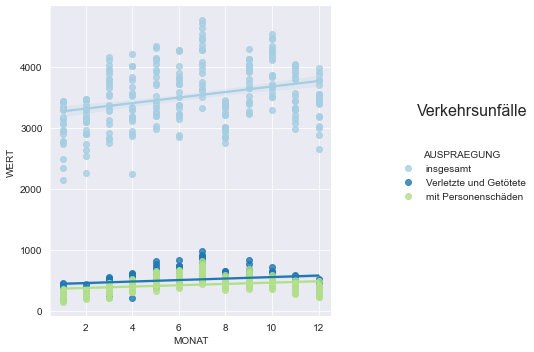

Alkoholunfälle


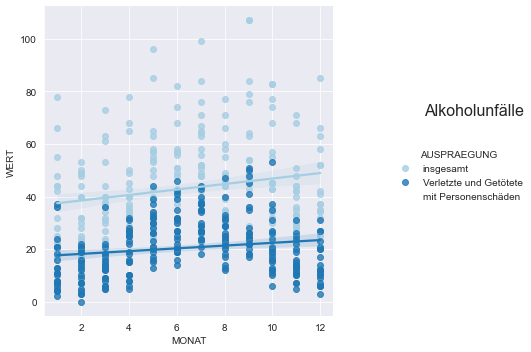

Fluchtunfälle


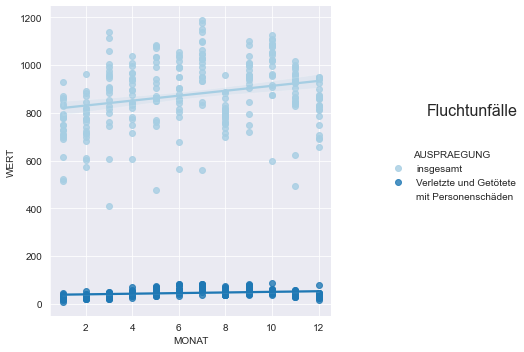

In [7]:
for i in range(df['MONATSZAHL'].value_counts().size):
    print(df['MONATSZAHL'].value_counts().index[i])
    g = sns.lmplot(x='MONAT', y='WERT', data=df[df['MONATSZAHL'] == df['MONATSZAHL'].value_counts().index[i]], hue='AUSPRAEGUNG', 
                    hue_order=['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'], palette='Paired')
    g.fig.suptitle(df['MONATSZAHL'].value_counts().index[i], x=1, y=0.7, fontsize=16)
    plt.savefig('./plots/category_' + str(df['MONATSZAHL'].value_counts().index[i]) + '_reg.png', bbox_inches='tight')
    plt.show()

Verkehrsunfälle


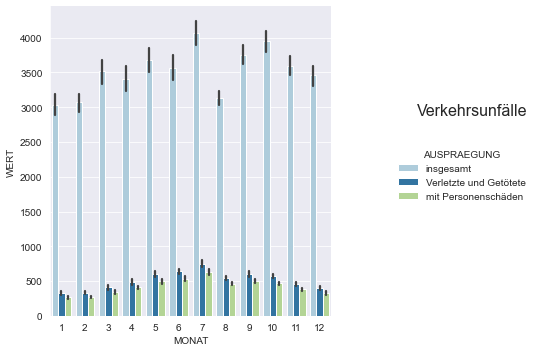

Alkoholunfälle


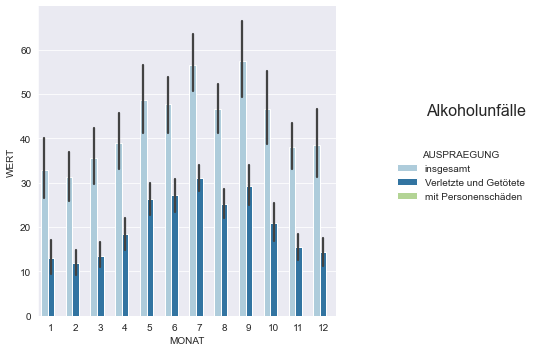

Fluchtunfälle


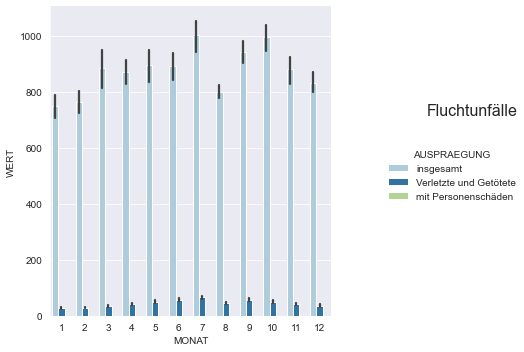

In [8]:
for i in range(df['MONATSZAHL'].value_counts().size):
    print(df['MONATSZAHL'].value_counts().index[i])
    g = sns.catplot(x='MONAT', y='WERT', data=df[df['MONATSZAHL'] == df['MONATSZAHL'].value_counts().index[i]], hue='AUSPRAEGUNG', 
                    hue_order=['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'], kind='bar', palette='Paired')
    g.fig.suptitle(df['MONATSZAHL'].value_counts().index[i], x=1, y=0.7, fontsize=16)
    plt.savefig('./plots/category_' + str(df['MONATSZAHL'].value_counts().index[i]) + '_bar.png', bbox_inches='tight')
    plt.show()

2. Visualize the accident number per category and year.

Verkehrsunfälle


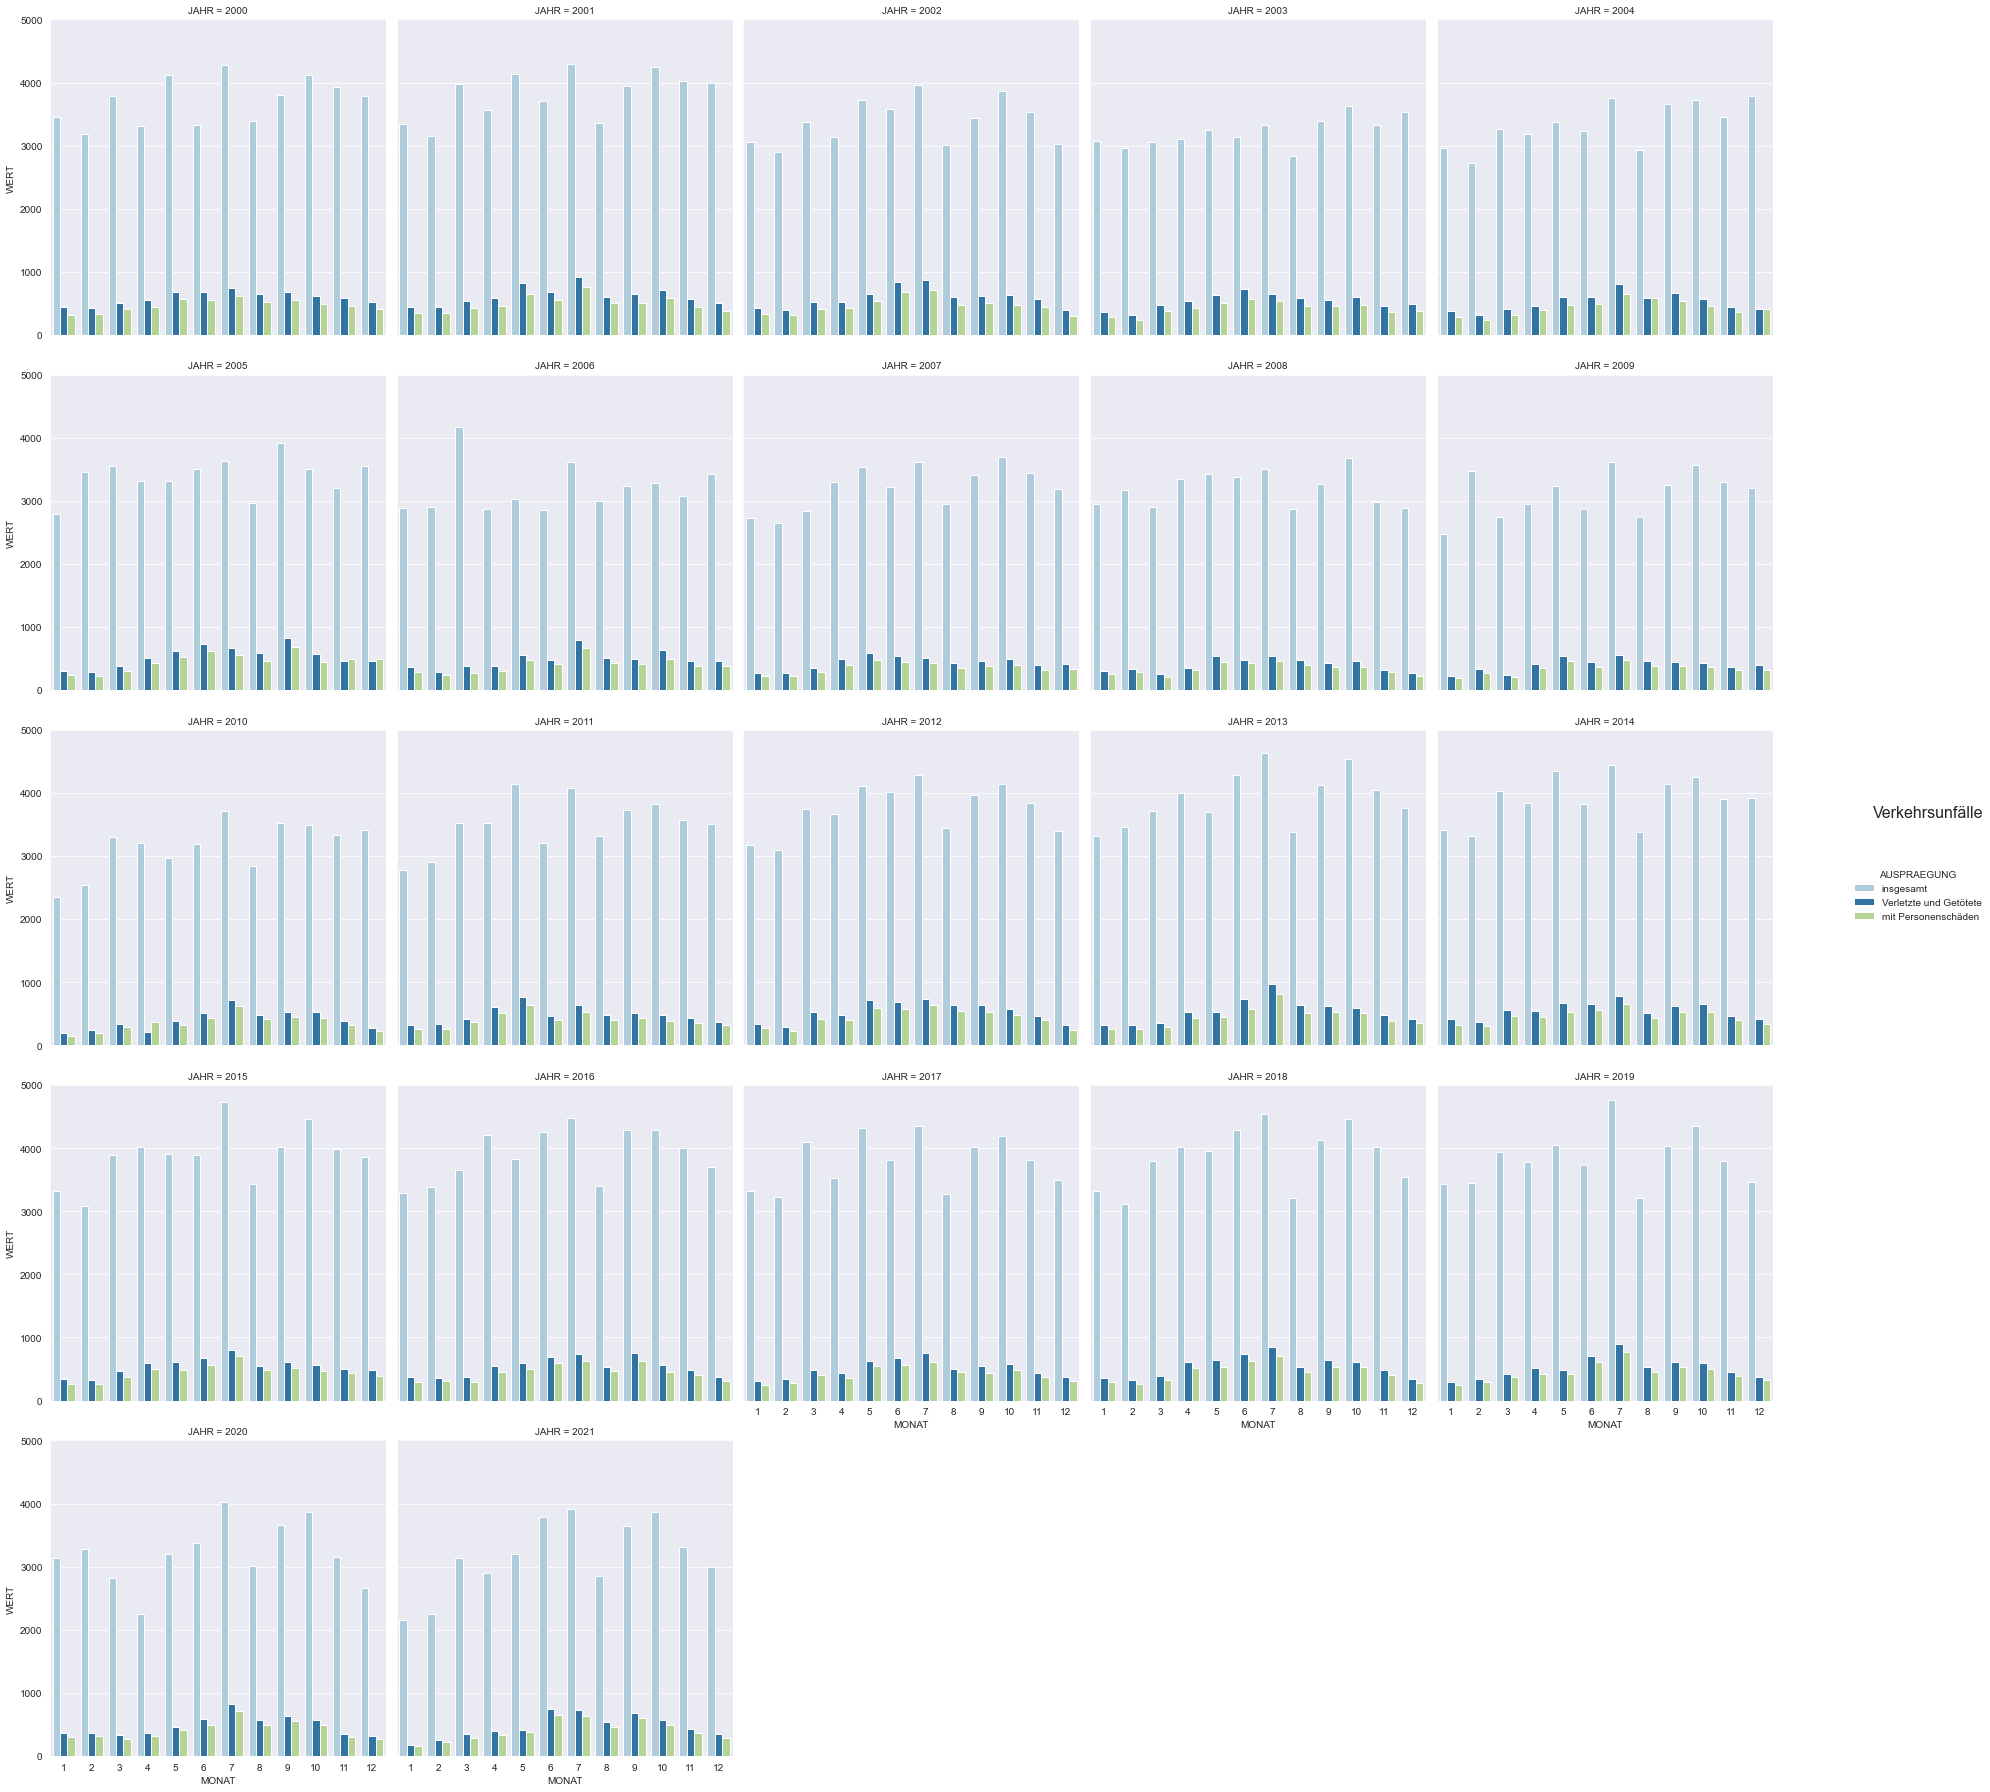

Alkoholunfälle


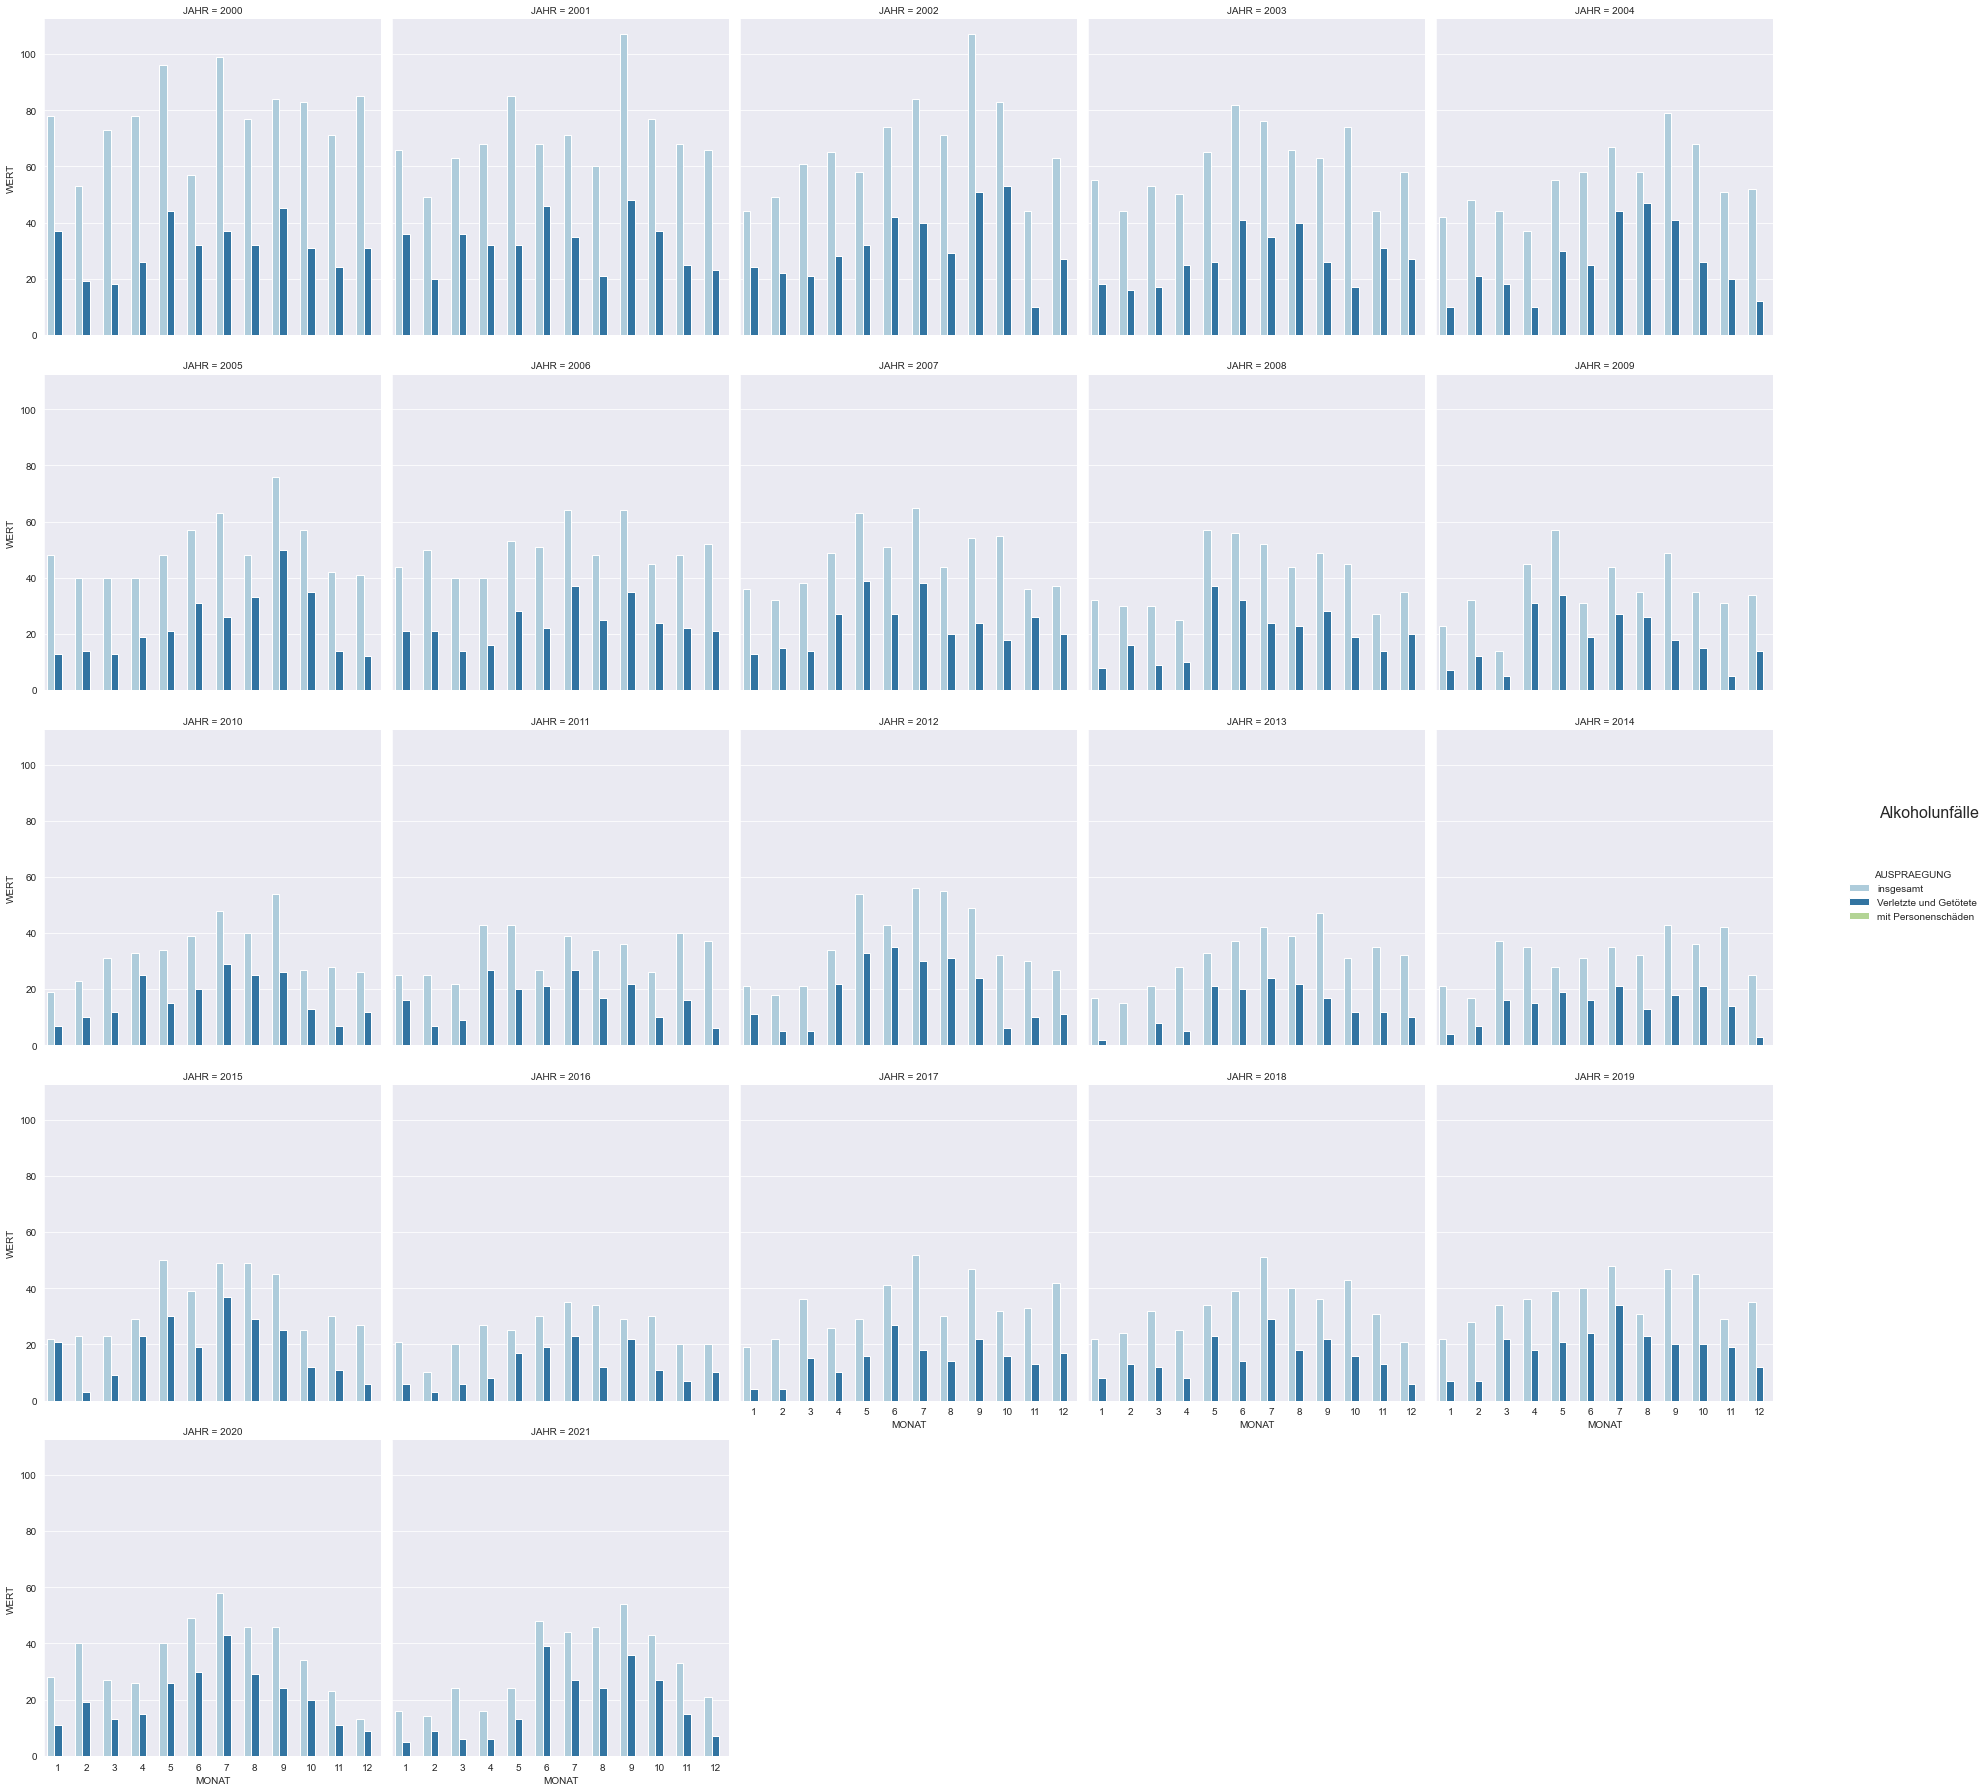

Fluchtunfälle


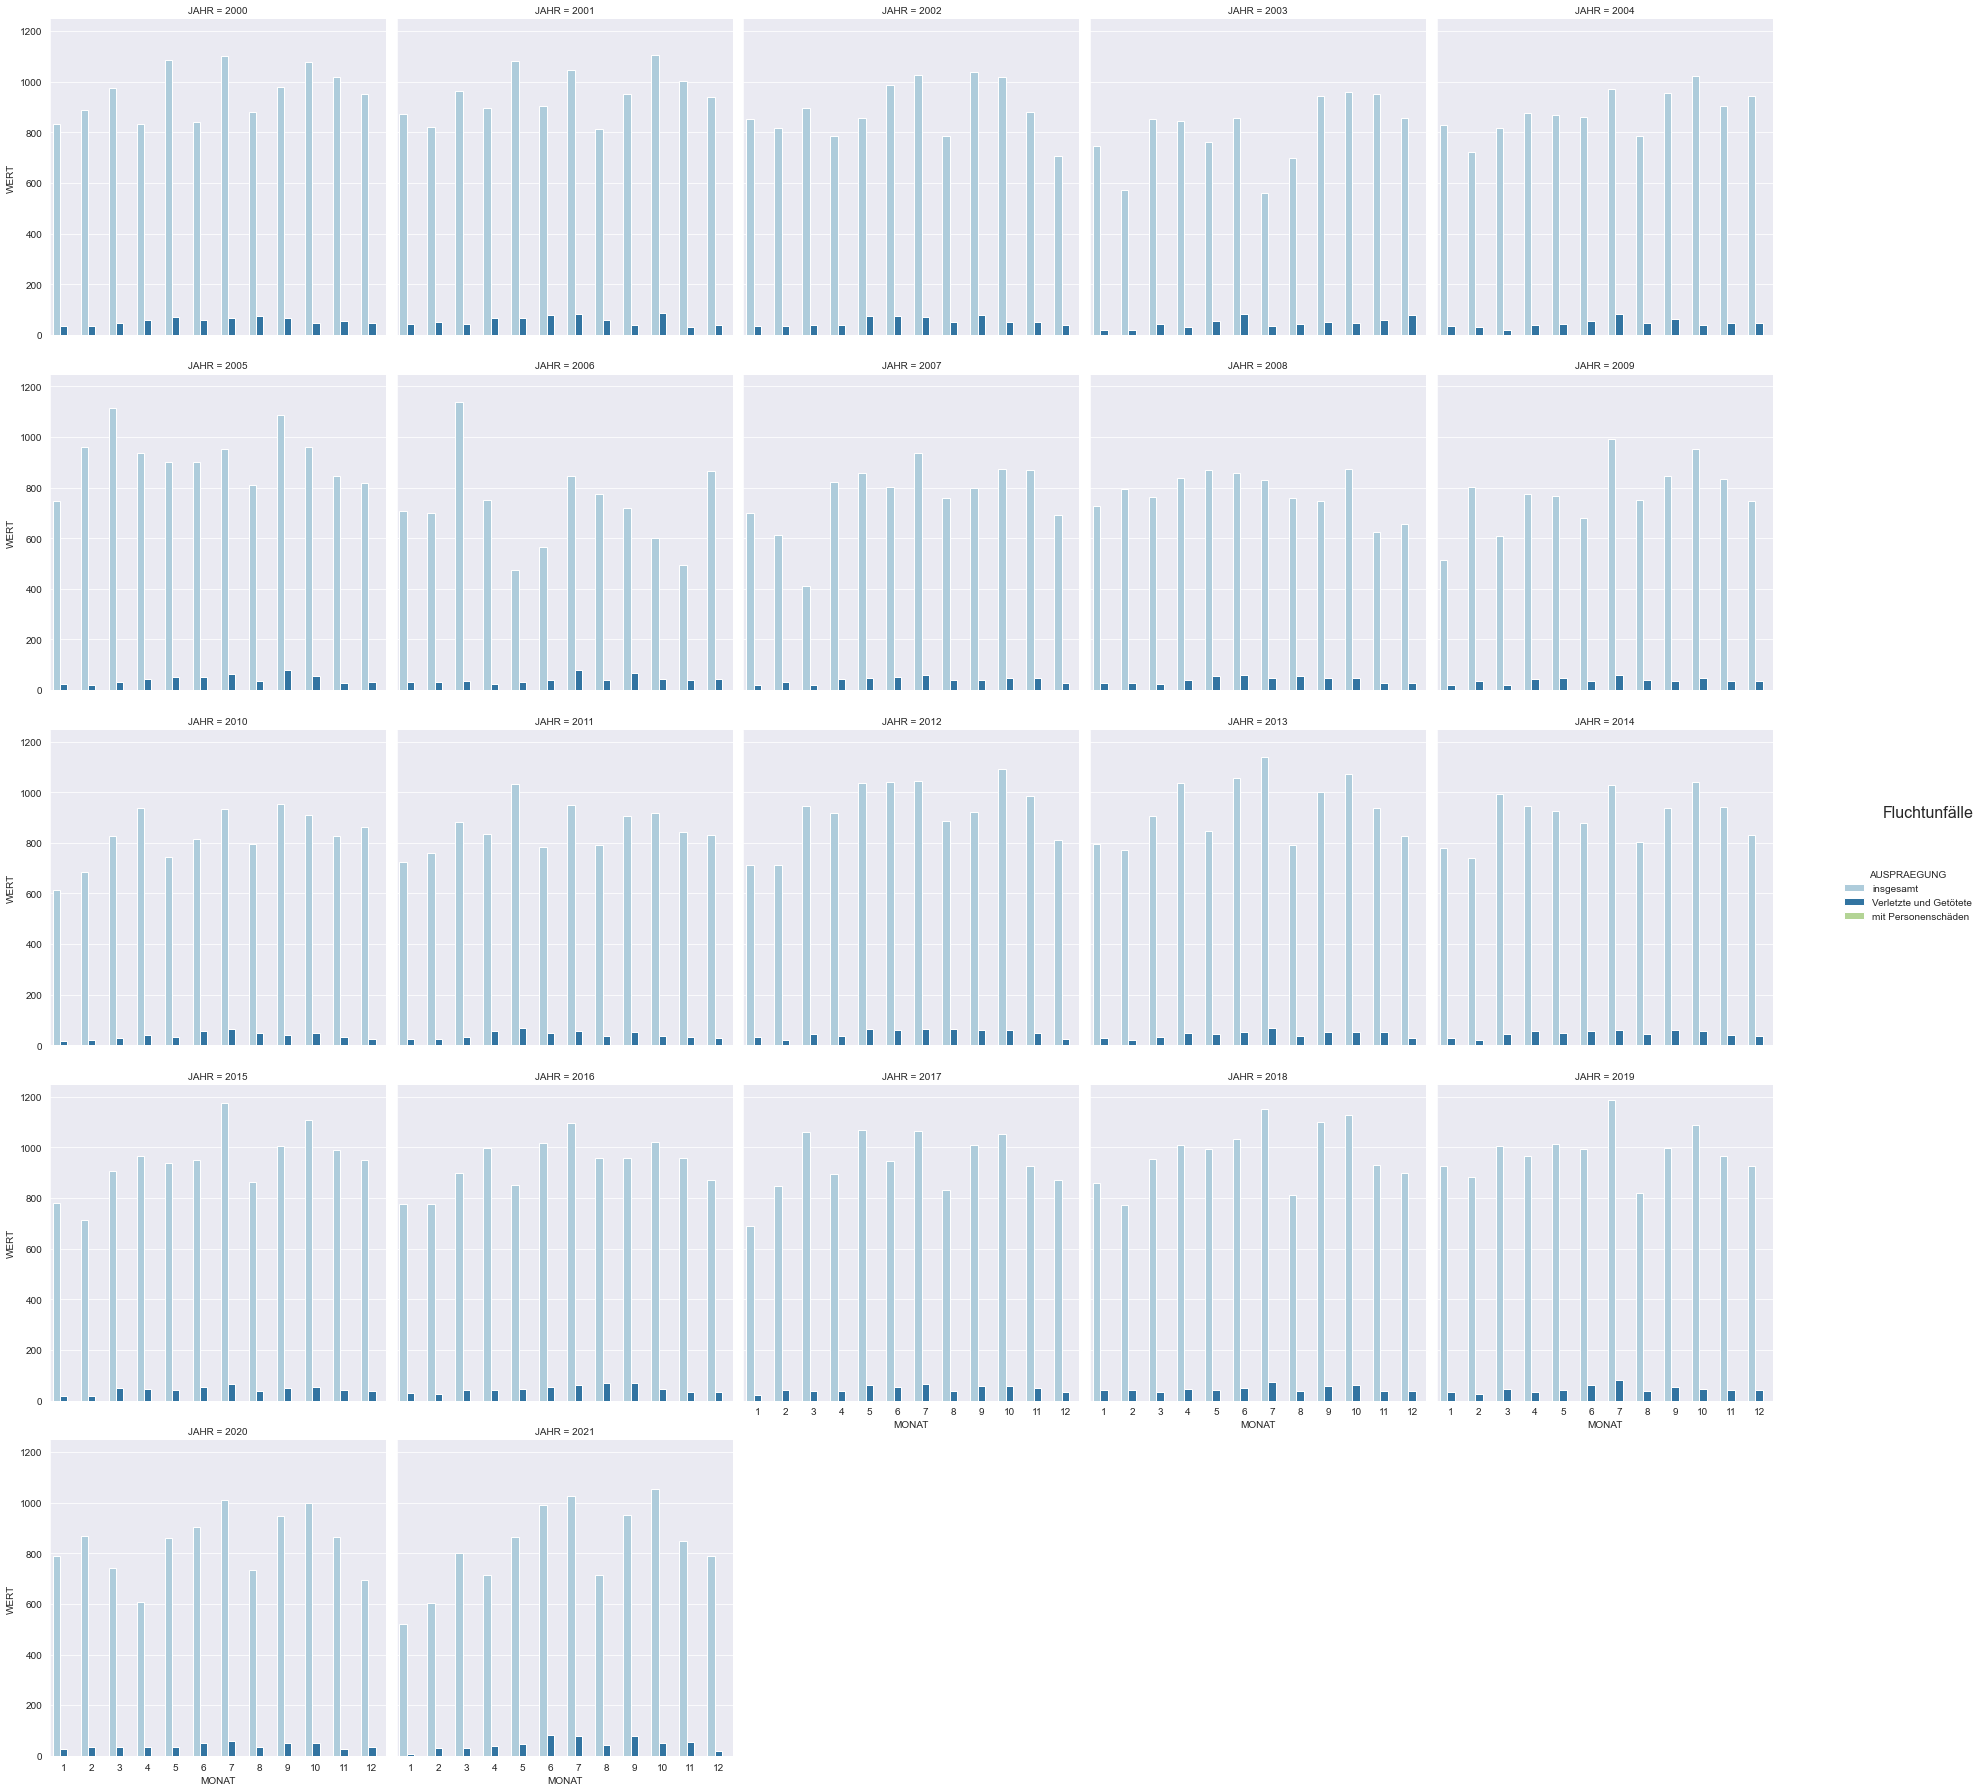

In [9]:
for i in range(df['MONATSZAHL'].value_counts().size):
    print(df['MONATSZAHL'].value_counts().index[i])
    g = sns.catplot(x='MONAT', y='WERT', data=df[df['MONATSZAHL'] == df['MONATSZAHL'].value_counts().index[i]], hue='AUSPRAEGUNG', 
                    hue_order=['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'], kind='bar', col='JAHR', col_wrap=5, palette='Paired', legend_out=True)
    g.fig.suptitle(df['MONATSZAHL'].value_counts().index[i], x=1, y=0.55, fontsize=16)
    plt.savefig('./plots/category_year_' + str(df['MONATSZAHL'].value_counts().index[i]) + '_bar.png', bbox_inches='tight')
    plt.show()

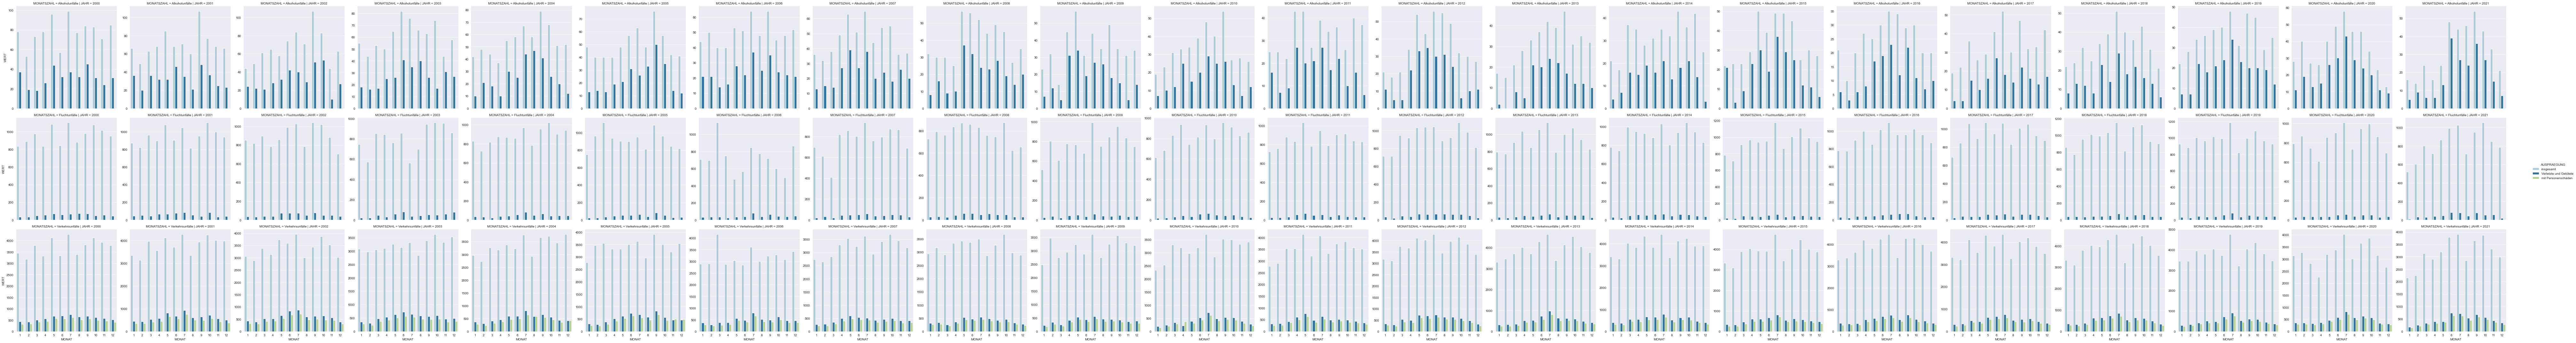

In [10]:
sns.catplot(x='MONAT', y='WERT', data=df, hue='AUSPRAEGUNG', kind='bar', row='MONATSZAHL', col='JAHR', sharey=False, palette='Paired')
plt.savefig('./plots/category_year_overview_bar.png', bbox_inches='tight')
plt.show()

Verkehrsunfälle


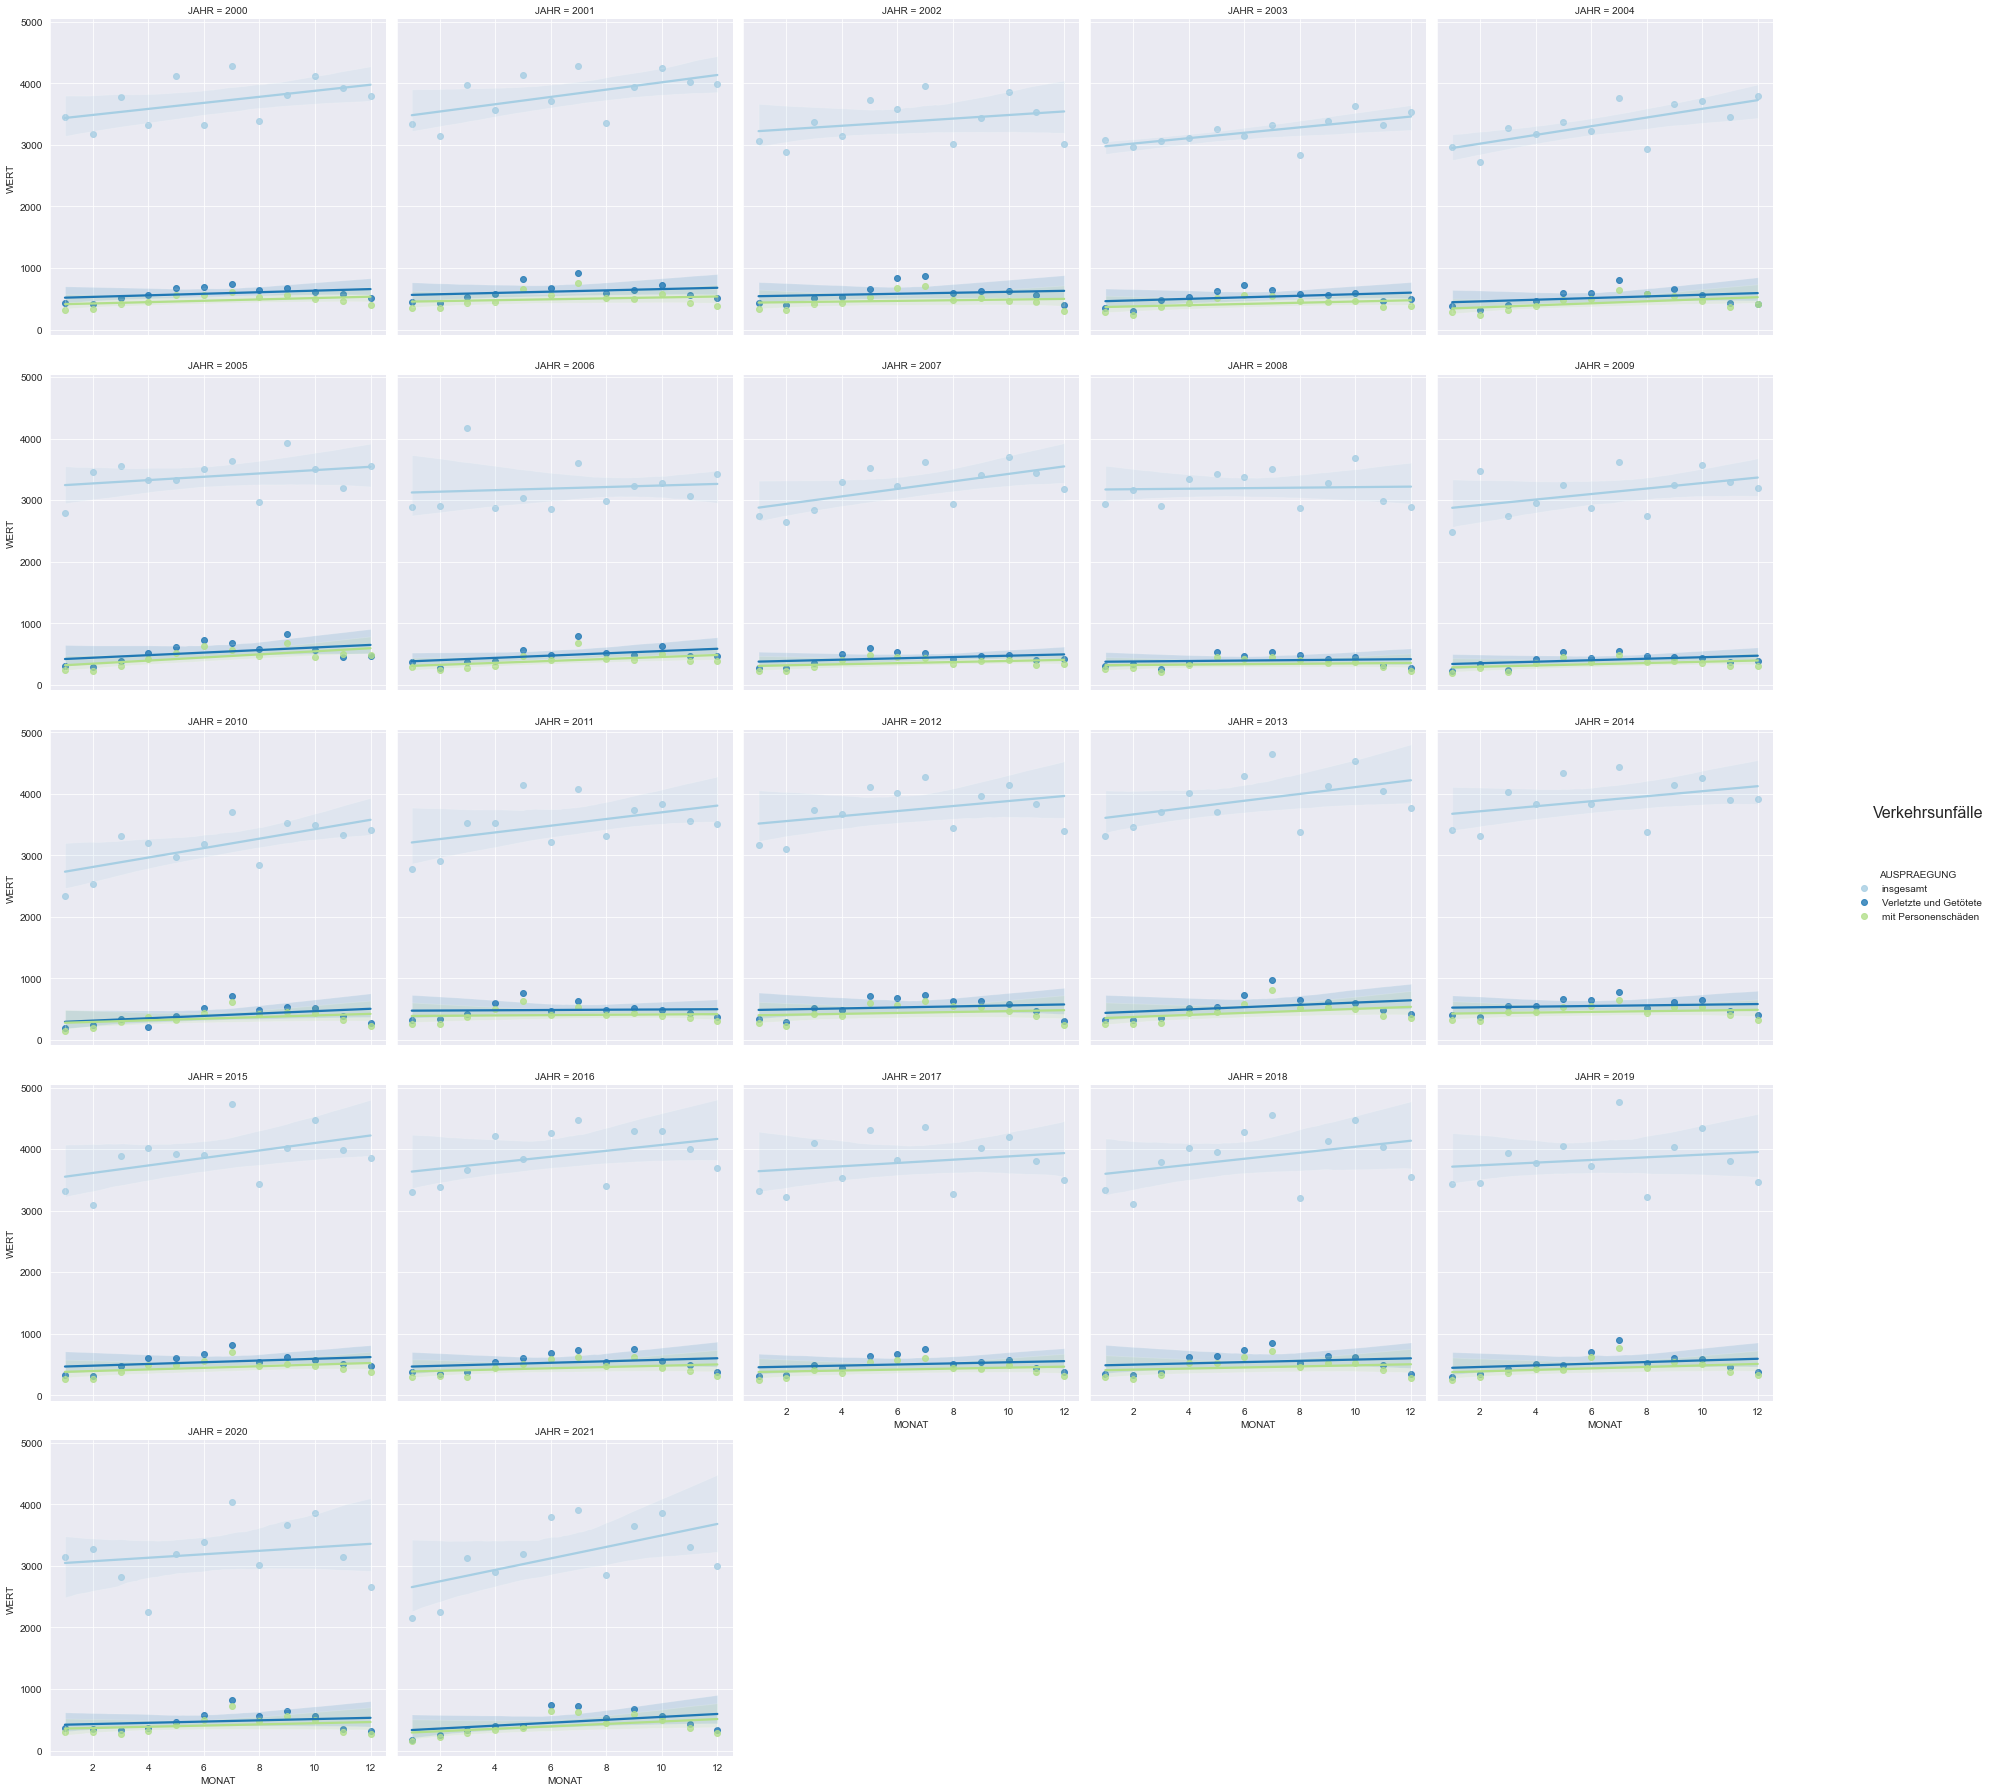

Alkoholunfälle


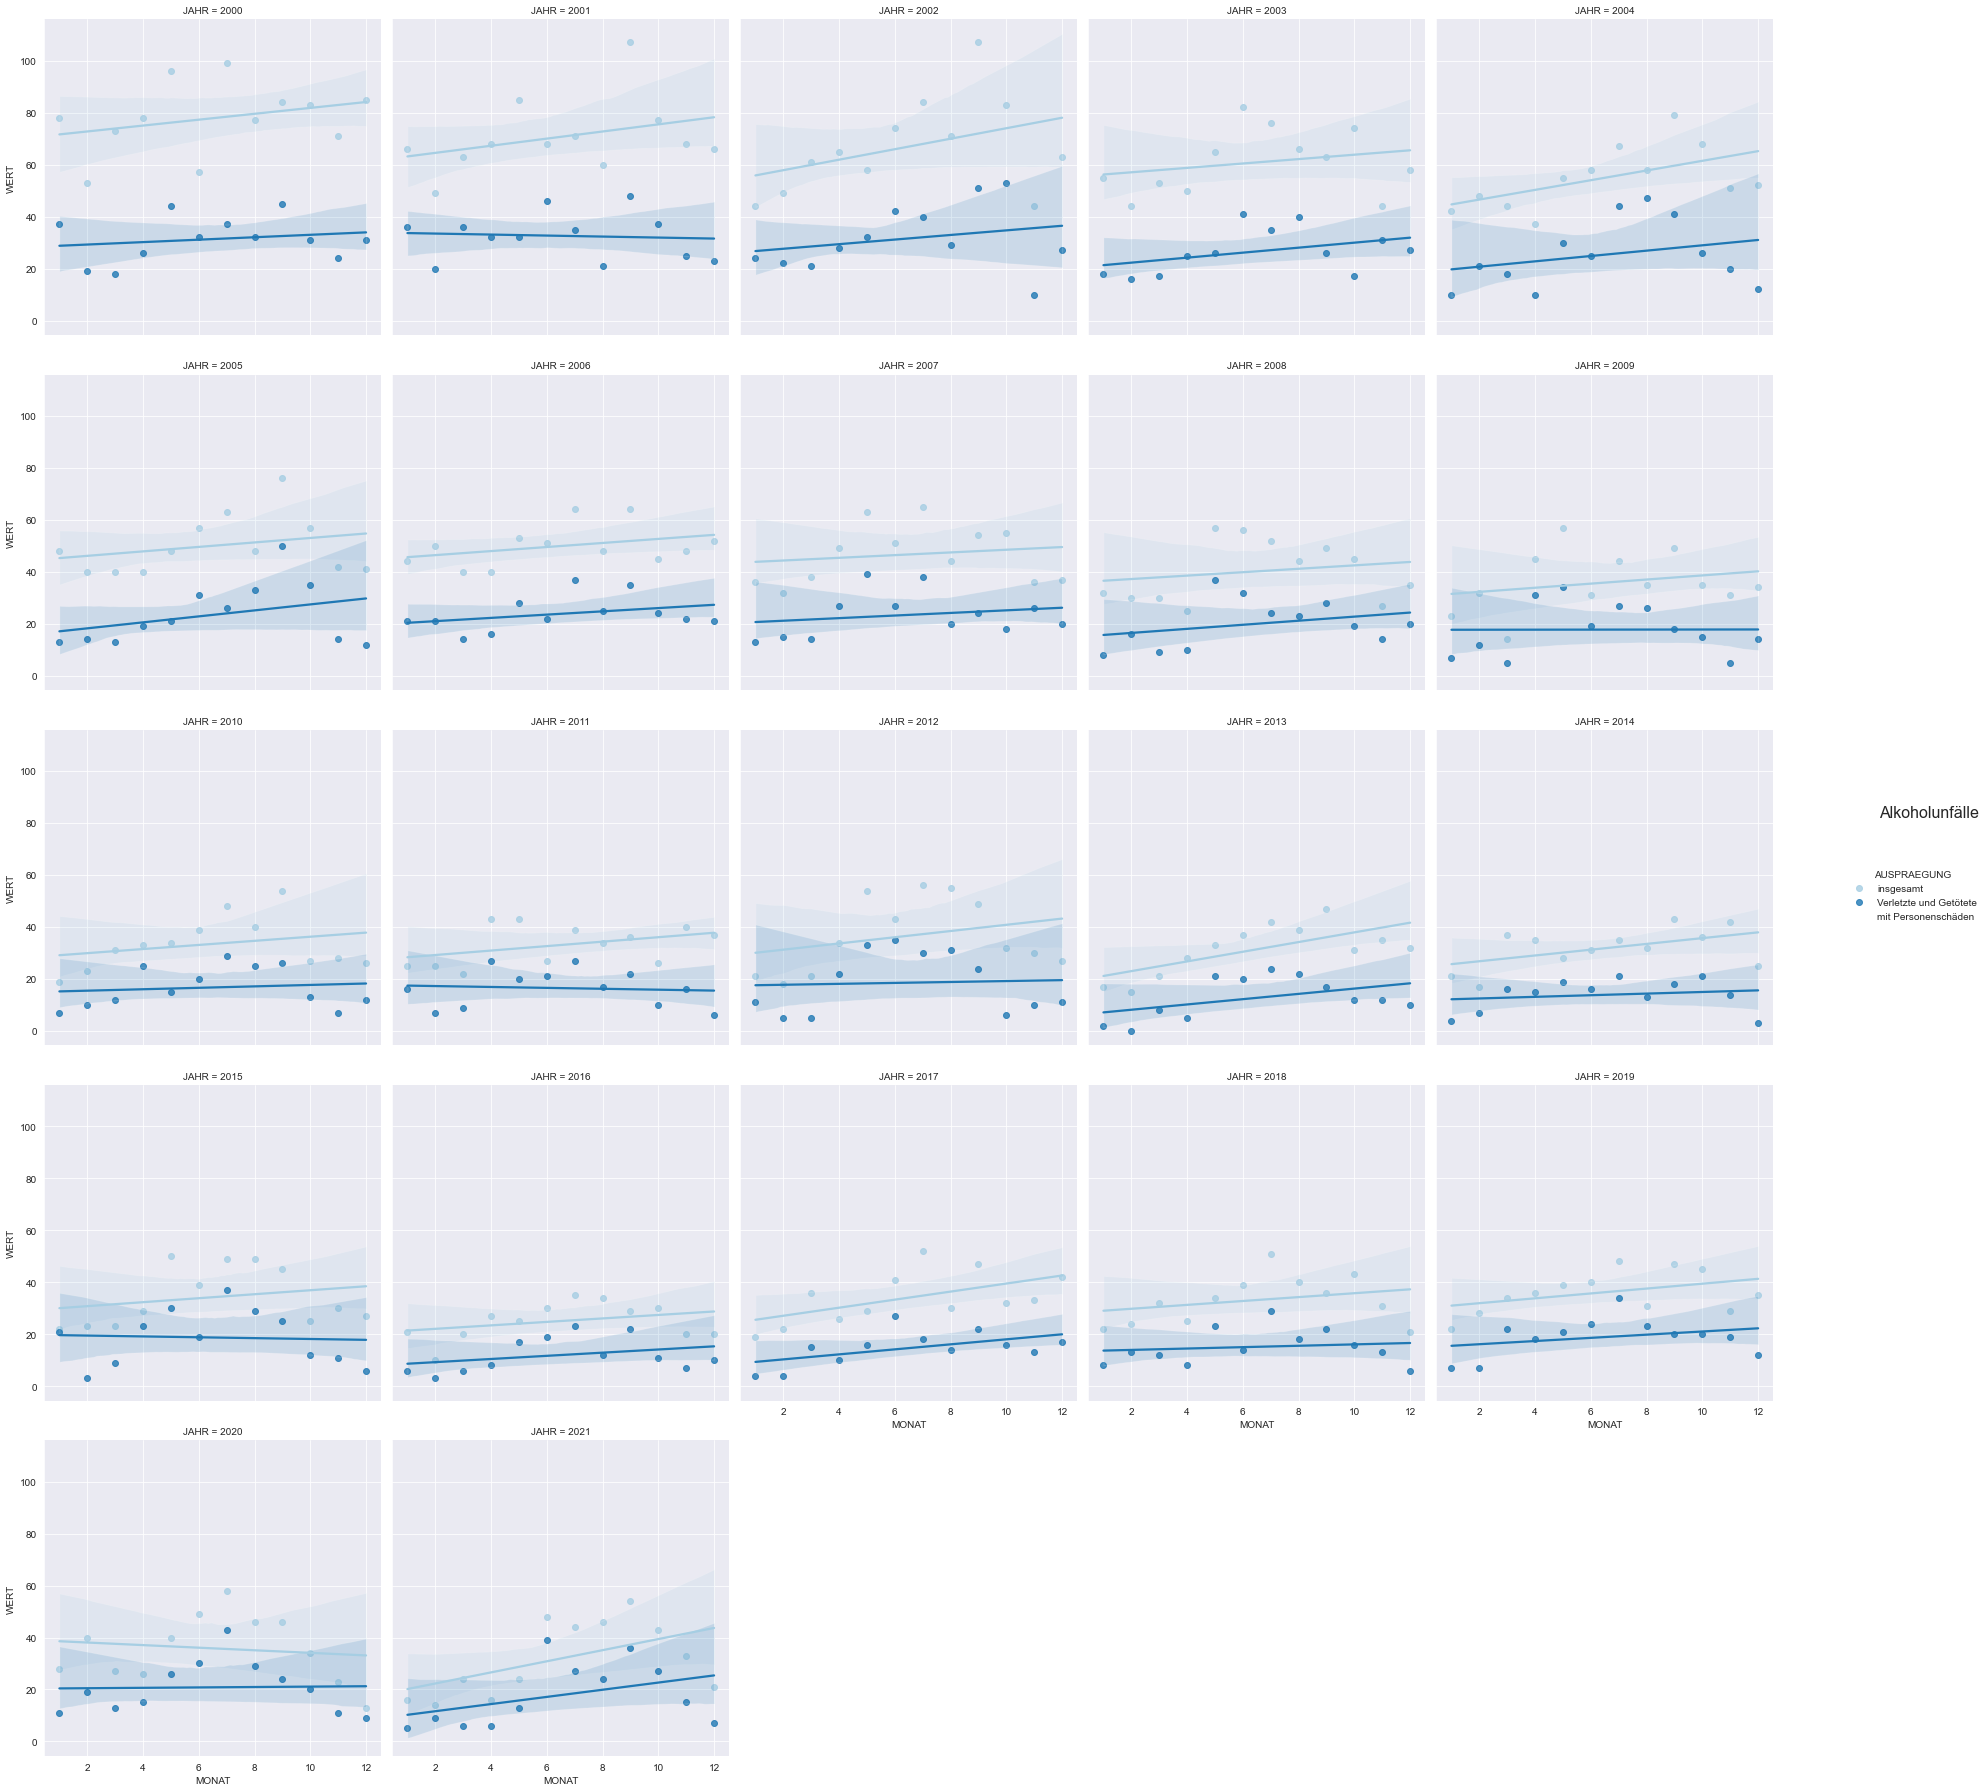

Fluchtunfälle


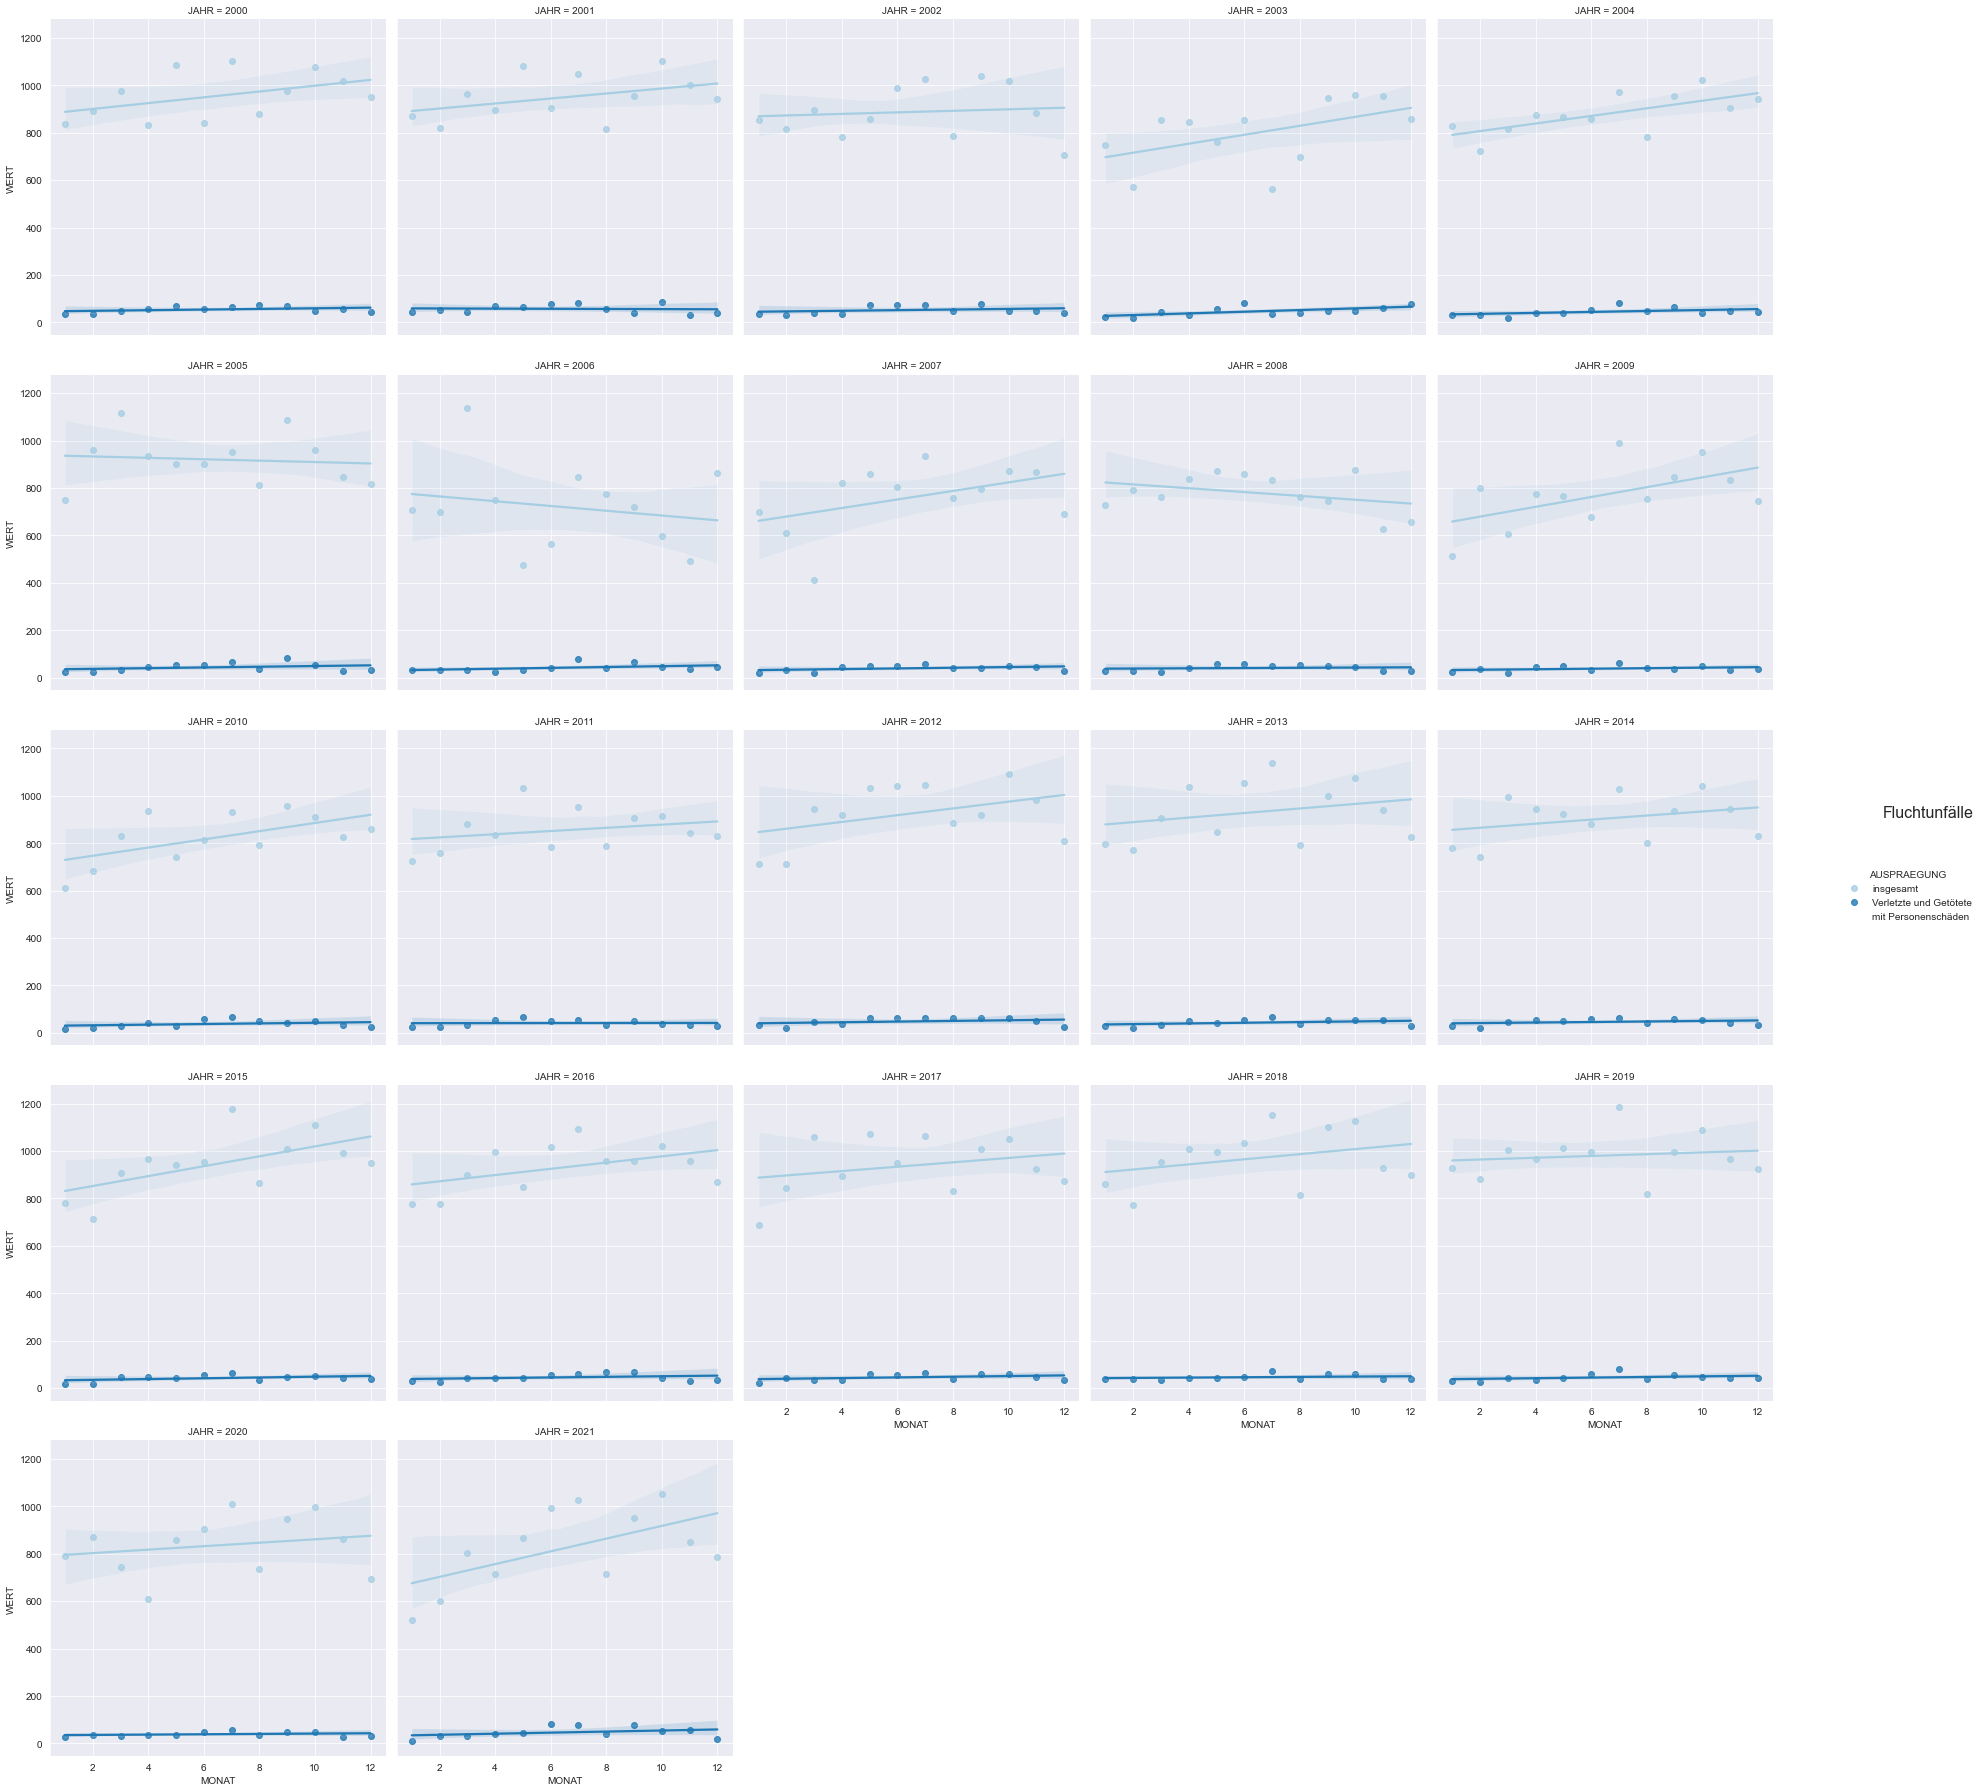

In [11]:
for i in range(df['MONATSZAHL'].value_counts().size):
    print(df['MONATSZAHL'].value_counts().index[i])
    g = sns.lmplot(x='MONAT', y='WERT', data=df[df['MONATSZAHL'] == df['MONATSZAHL'].value_counts().index[i]], hue='AUSPRAEGUNG', 
                    hue_order=['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'], col='JAHR', col_wrap=5, palette='Paired')
    g.fig.suptitle(df['MONATSZAHL'].value_counts().index[i], x=1, y=0.55, fontsize=16)
    plt.savefig('./plots/category_year_' + str(df['MONATSZAHL'].value_counts().index[i]) + '_reg.png', bbox_inches='tight')
    plt.show()

3. Visualize the accident number per year.

In [12]:
print(df['JAHR'].value_counts())

JAHR
2021    84
2020    84
2001    84
2002    84
2003    84
2004    84
2005    84
2006    84
2007    84
2008    84
2009    84
2010    84
2011    84
2012    84
2013    84
2014    84
2015    84
2016    84
2017    84
2018    84
2019    84
2000    84
Name: count, dtype: int64


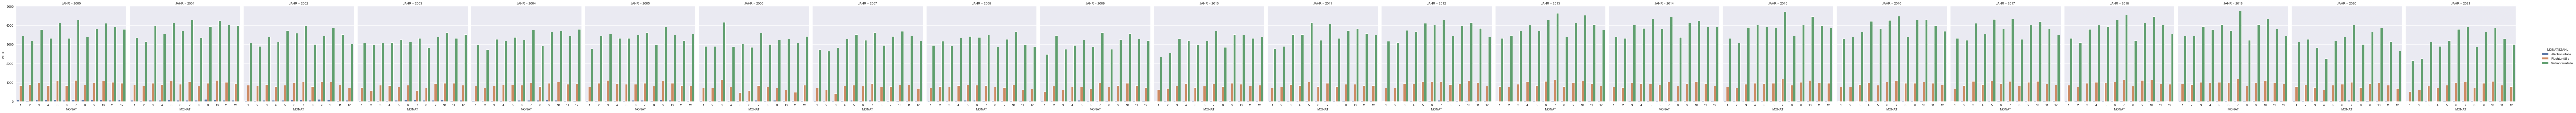

In [13]:
sns.catplot(x='MONAT', y='WERT', data=df[df['AUSPRAEGUNG'] == 'insgesamt'], hue='MONATSZAHL', kind='bar', col='JAHR', sharey=True, palette='deep')
plt.savefig('./plots/year_insgesamt_bar.png', bbox_inches='tight')
plt.show()

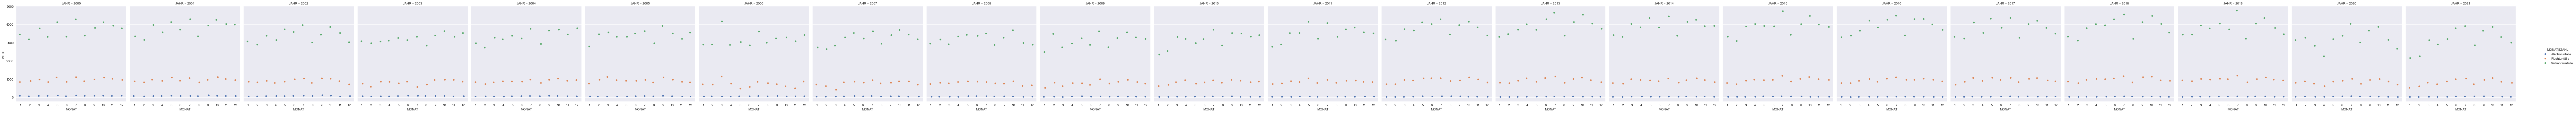

In [14]:
sns.catplot(x='MONAT', y='WERT', data=df[df['AUSPRAEGUNG'] == 'insgesamt'], hue='MONATSZAHL', kind='strip', col='JAHR', sharey=True, palette='deep')
plt.show()

Interactive yearly overview.

In [15]:
df_year = df.groupby(['JAHR', 'MONATSZAHL', 'AUSPRAEGUNG']).sum().reset_index()
df_year = df_year[['JAHR', 'MONATSZAHL', 'AUSPRAEGUNG', 'WERT']]
df_year

JAHR       MONATSZAHL             AUSPRAEGUNG     WERT
0    2000   Alkoholunfälle  Verletzte und Getötete    376.0
1    2000   Alkoholunfälle               insgesamt    934.0
2    2000    Fluchtunfälle  Verletzte und Getötete    658.0
3    2000    Fluchtunfälle               insgesamt  11467.0
4    2000  Verkehrsunfälle  Verletzte und Getötete   7053.0
..    ...              ...                     ...      ...
149  2021    Fluchtunfälle  Verletzte und Getötete    556.0
150  2021    Fluchtunfälle               insgesamt   9879.0
151  2021  Verkehrsunfälle  Verletzte und Getötete   5560.0
152  2021  Verkehrsunfälle               insgesamt  38015.0
153  2021  Verkehrsunfälle     mit Personenschäden   4825.0

[154 rows x 4 columns]

In [16]:
fig = px.bar(df_year, x="JAHR", y="WERT", color="MONATSZAHL", pattern_shape="AUSPRAEGUNG", title="Accident Number Yearly Overview", barmode="group",
             category_orders={"AUSPRAEGUNG": ['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden']})
fig.update_layout(autosize=True)
fig.write_image('./plots/year_overview_interactive_bar.png')
fig.show()